In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [33]:
data = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data-original", delim_whitespace = True, \
 header=None, names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model', 'origin', 'car_name'])

data['mpg']
data.mpg
data.iloc[0,:]

print(data.shape)

(406, 9)


In [34]:
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino
...,...,...,...,...,...,...,...,...,...
401,27.0,4.0,140.0,86.0,2790.0,15.6,82.0,1.0,ford mustang gl
402,44.0,4.0,97.0,52.0,2130.0,24.6,82.0,2.0,vw pickup
403,32.0,4.0,135.0,84.0,2295.0,11.6,82.0,1.0,dodge rampage
404,28.0,4.0,120.0,79.0,2625.0,18.6,82.0,1.0,ford ranger


## 1. How many cars and how many attributes are in the data set

In [35]:
print("Number of cars: ", data.shape[0])
print("Number of attributes: ", data.shape[1])

Number of cars:  406
Number of attributes:  9


## 2. 

###  How many distinct car companies are represented in the data set?

In [36]:
data["company"] = data["car_name"].str.split(" ").str[0]
data["company"].nunique()

38

### What is the name of the car with the best MPG? 

In [37]:
data.loc[data["mpg"] == data["mpg"].max(), ["car_name", "mpg"]] 

,car_name,mpg
329,mazda glc,46.6


### What car company produced the most 8-cylinder cars? 

In [38]:
count_cylinder_df = data.groupby(["company", "cylinders"])[["car_name"]].count().reset_index()
eight_cylinders_df = count_cylinder_df[count_cylinder_df["cylinders"] == 8.0]
eight_cylinders_df[eight_cylinders_df["car_name"] == eight_cylinders_df["car_name"].max()]

,company,cylinders,car_name
29,ford,8.0,22


### What are the names of 3-cylinder cars? 

In [39]:
data.loc[data["cylinders"] == 3.0, ["cylinders", "car_name"]]

,cylinders,car_name
78,3.0,mazda rx2 coupe
118,3.0,maxda rx3
250,3.0,mazda rx-4
341,3.0,mazda rx-7 gs


### Do some internet search that can tell you about the history and popularity of those 3-cylinder cars.

> The cars listed in the given data appear to have 2 or 3 rotor Wankel rotary engines which produce power similar to a larger 4 or 6 cylinder engine, but with fewer moving parts. These engines were used by Mazda in their vehicles during the 1970s and 1980s.
> At that time, Mazda was the only major automaker producing cars with Wankel engines. The 1978 Mazda RX-7, for example, was one of the most popular sports cars of its time and is still highly sought after by collectors today.

## 3. What is the range, mean, and standard deviation of each attribute? Pay attention to potential missing values.

In [50]:
# fill missing values with mean column values
data.fillna(data.mean(numeric_only=True), inplace=True)

# Calculate the range, mean, and standard deviation of each numerical attribute
summary = pd.DataFrame({
    'Range': data.max(numeric_only=True) - data.min(numeric_only=True),
    'Mean': data.mean(numeric_only=True).round(3),
    'Std': data.std(numeric_only=True).round(3)
})

# Set the name of the index
summary.index.name = 'Attribute'

summary

,Range,Mean,Std
Attribute,,,
mpg,37.6,23.515,7.738
cylinders,5.0,5.475,1.712
displacement,387.0,194.780,104.922
horsepower,184.0,105.083,38.481
weight,3527.0,2979.414,847.004
acceleration,16.8,15.520,2.803
model,12.0,75.921,3.749
origin,2.0,1.569,0.797
year,12.0,1975.921,3.749


## 4. Plot histograms for each attribute. Pay attention to the appropriate choice of number of bins. Write 2-3 sentences summarizing some interesting aspects of the data by looking at the histograms.

array([[<AxesSubplot:title={'center':'mpg'}>,
        <AxesSubplot:title={'center':'cylinders'}>,
        <AxesSubplot:title={'center':'displacement'}>],
       [<AxesSubplot:title={'center':'horsepower'}>,
        <AxesSubplot:title={'center':'weight'}>,
        <AxesSubplot:title={'center':'acceleration'}>],
       [<AxesSubplot:title={'center':'model'}>,
        <AxesSubplot:title={'center':'origin'}>, <AxesSubplot:>]],
      dtype=object)

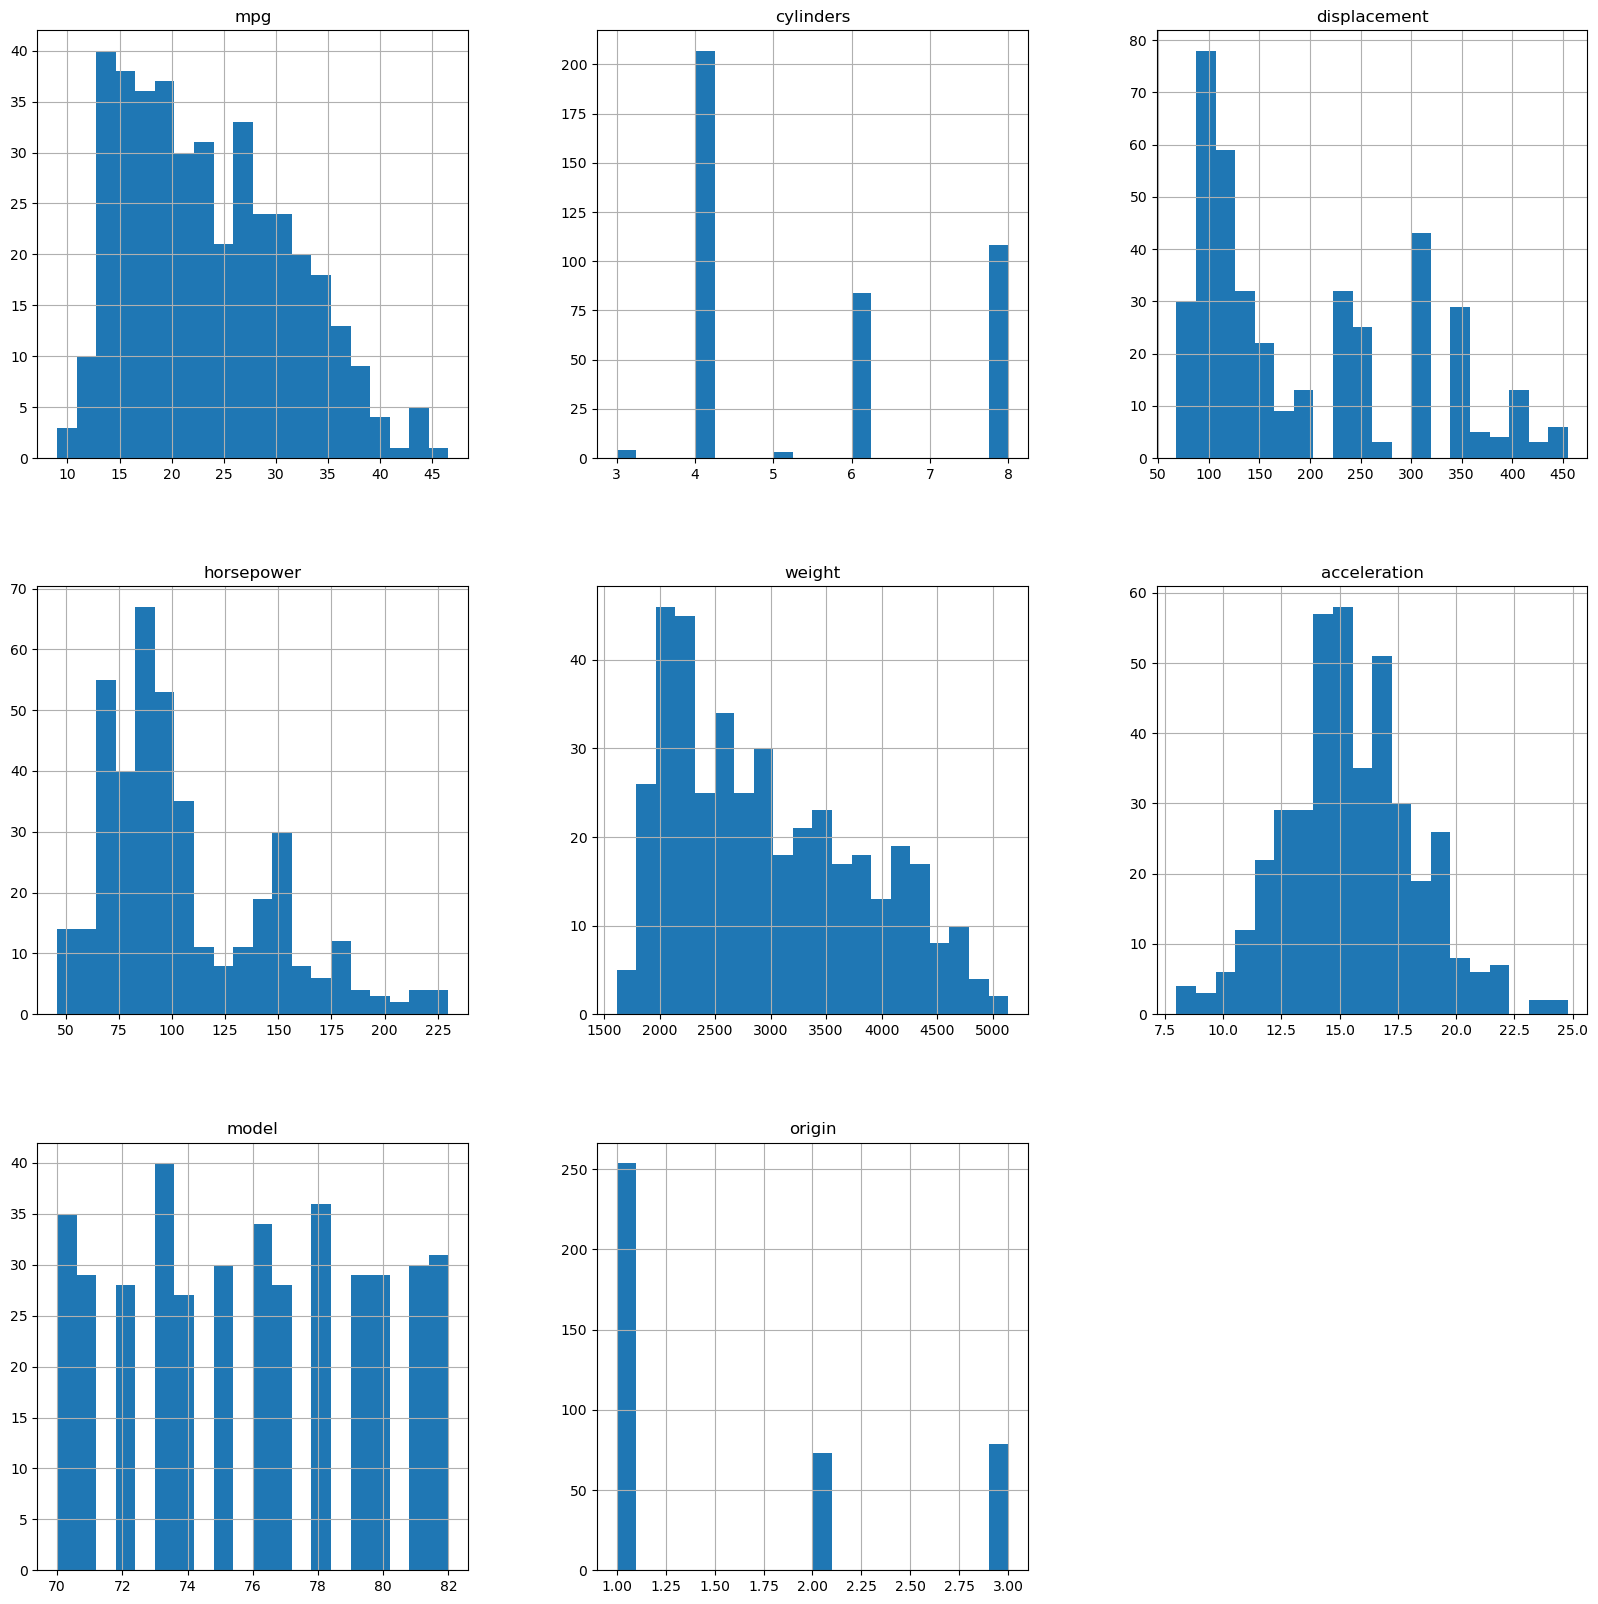

In [40]:
# plot hist for each attr
data.hist(figsize=(20, 20), bins=20)

## 5. Plot a scatterplot of weight vs. MPG attributes. What do you conclude about the relationship between the attributes? What is the correlation coefficient between the 2 attributes?

<AxesSubplot:xlabel='weight', ylabel='mpg'>

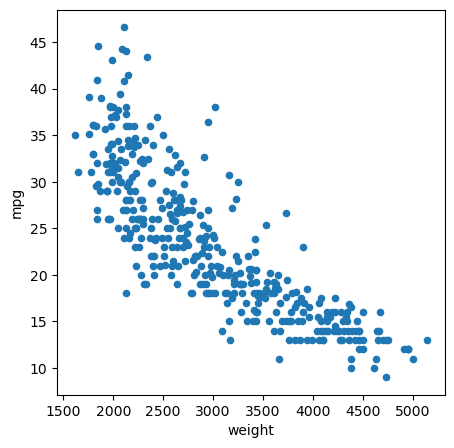

In [41]:
data.plot(kind="scatter", x="weight", y="mpg", figsize=(5, 5))

> Weight and MPG are negatively correlated. As weight increases, MPG decreases.

In [42]:
print("Correlation coefficient between the 2 attributes: ", data[["weight", "mpg"]].corr()[["weight"]].iloc[-1].to_list()[0])


Correlation coefficient between the 2 attributes:  -0.8317409332443344


## 6. Plot a scatterplot of year vs. cylinders attributes. Add a small random noise to the values to make the scatterplot look nicer. What can you conclude? Do some internet search about the history of car industry during 70’s that might explain the results.(Hint: data.mpg + np.random.random(len(data.mpg)) will add small random noise)

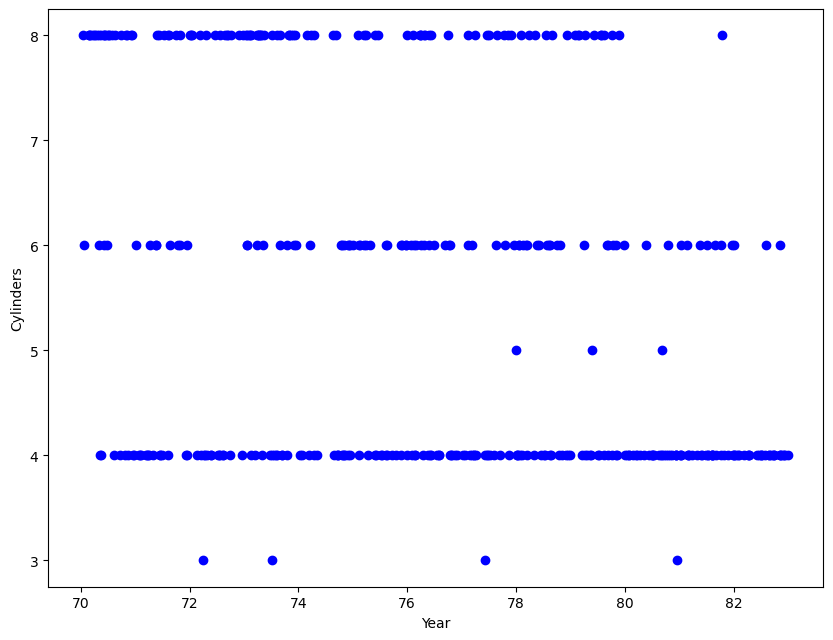

In [52]:
# Set the figure size
fig_obj = plt.figure(figsize=(10, 7.5))
ax = plt.subplot(111)

# Plot a scatterplot of year vs. cylinders attributes
p = plt.plot(data.model + np.random.random(len(data.model)), data.cylinders, 'o', color='b')

# Set the labels
plt.xlabel('Year')
plt.ylabel('Cylinders')

plt.show()

## 7. Show 2 more scatterplots that are interesting do you. Discuss what you see.

<AxesSubplot:xlabel='horsepower', ylabel='mpg'>

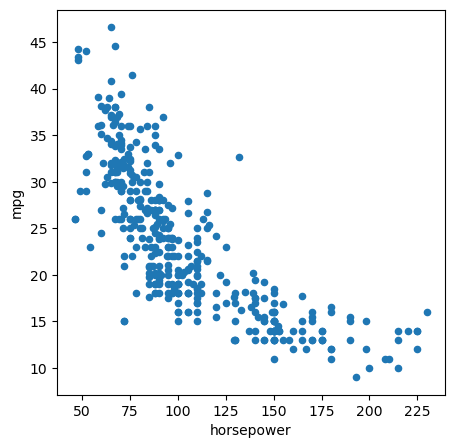

In [43]:
data.plot(kind="scatter", x="horsepower", y="mpg", figsize=(5, 5))

<AxesSubplot:xlabel='displacement', ylabel='horsepower'>

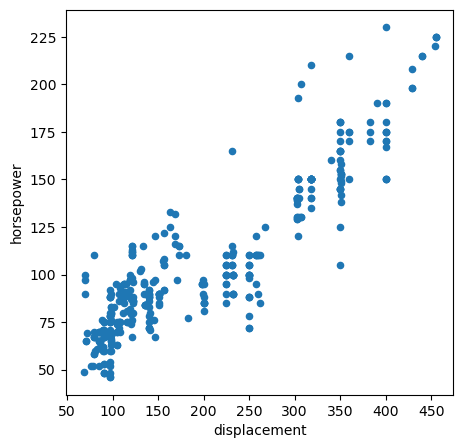

In [44]:
data.plot(kind="scatter", x="displacement", y="horsepower", figsize=(5, 5))

> According to wiki, displacement or engine displacement is the measure of the cylinder volume. I thought that if the displacement rose, the horsepower (how quickly the force is produced) would increase, so the displacement of the engine would be positively correlated with the horsepower of the car. As my expectation, the correlation is depicted precisely on the above scatter plot.

## 8. Plot a time series for all the companies that show how many new cars they introduces during each year. Do you see some interesting trends? (Hint: data.car name.str.split()[0] returns a vector of the first word of car name column.)

In [ ]:
data['company'] = data['car_name'].str.split().str.get(0)

In [ ]:
counts = data.groupby(['model', 'company'])['car_name'].count()

No handles with labels found to put in legend.


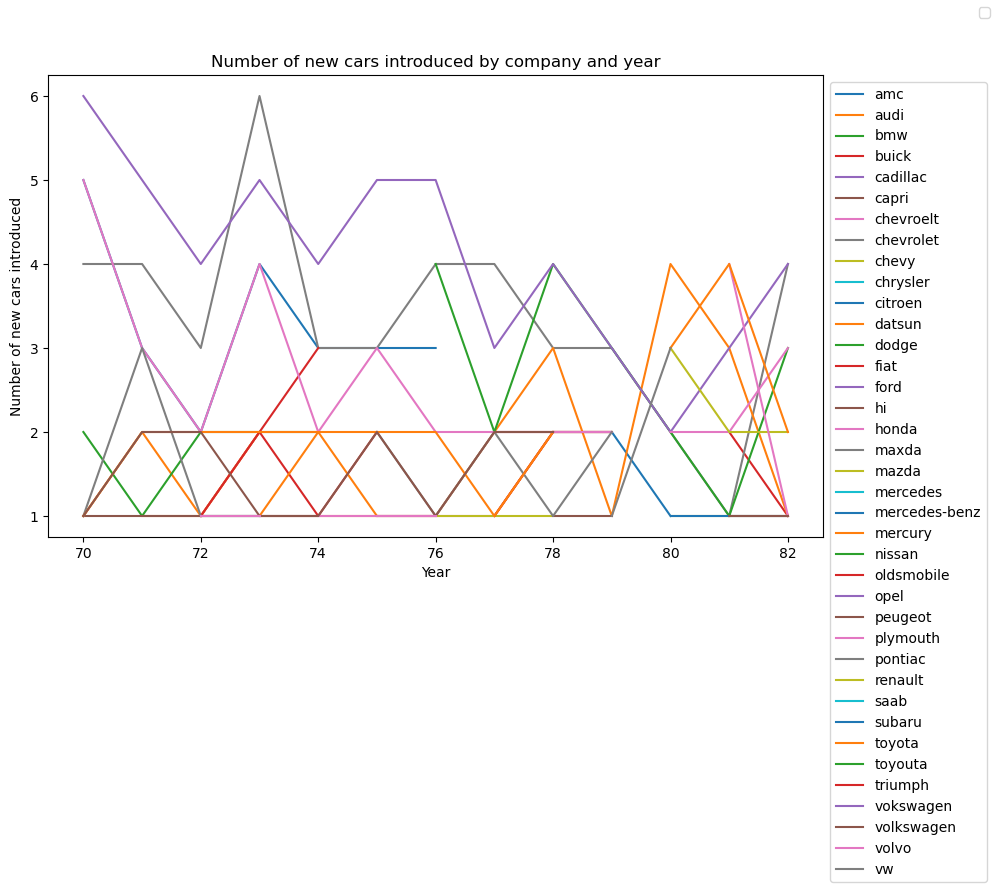

In [49]:
fig, ax = plt.subplots(figsize=(10,6))
fig.legend(loc='upper right')
counts.unstack().plot(ax=ax)
ax.set_title('Number of new cars introduced by company and year')
ax.set_xlabel('Year')
ax.set_ylabel('Number of new cars introduced')
plt.legend(loc='best', bbox_to_anchor=(1, 1))
plt.show()

## 9. Calculate the pairwise correlation, and draw the heatmap with Matplotlib. Do you see some interesting correlation? (Hint: data.iloc[:,0:8].corr(), plt.pcolor() draws the heatmap.)

                   mpg  cylinders  displacement  horsepower    weight  \
mpg           1.000000  -0.762698     -0.791268   -0.758059 -0.823327   
cylinders    -0.762698   1.000000      0.951787    0.840140  0.895220   
displacement -0.791268   0.951787      1.000000    0.894719  0.932475   
horsepower   -0.758059   0.840140      0.894719    1.000000  0.862617   
weight       -0.823327   0.895220      0.932475    0.862617  1.000000   
acceleration  0.409338  -0.522452     -0.557984   -0.692274 -0.430086   
model         0.565698  -0.360762     -0.381714   -0.419758 -0.315389   
origin        0.561059  -0.567478     -0.613056   -0.458538 -0.584109   

              acceleration     model    origin  
mpg               0.409338  0.565698  0.561059  
cylinders        -0.522452 -0.360762 -0.567478  
displacement     -0.557984 -0.381714 -0.613056  
horsepower       -0.692274 -0.419758 -0.458538  
weight           -0.430086 -0.315389 -0.584109  
acceleration      1.000000  0.301992  0.218845  

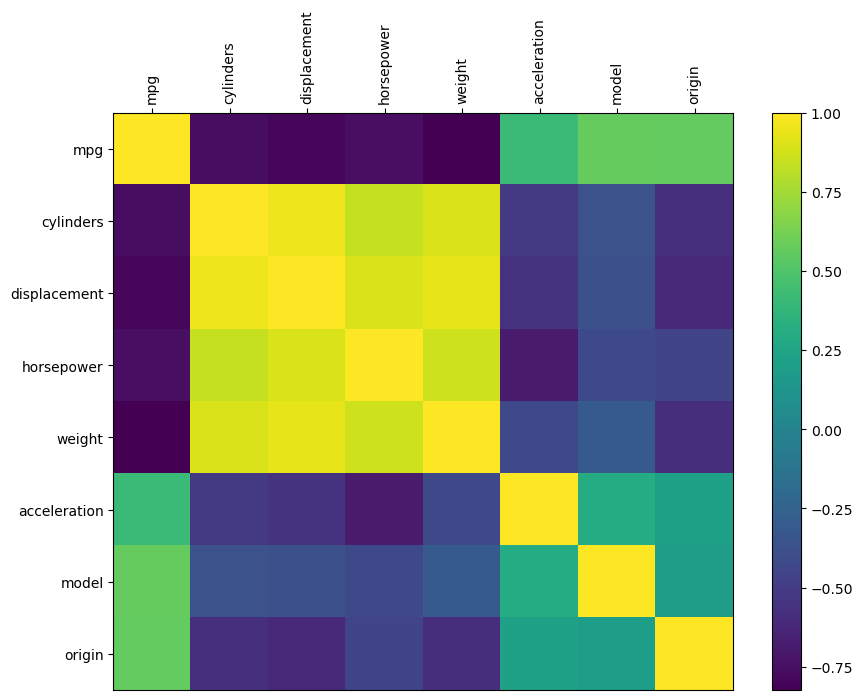

In [53]:
# Calculate the pairwise correlation
corr = data.iloc[:,0:8].corr()

print(corr)
# Draw the heatmap with Matplotlib
fig_obj = plt.figure(figsize=(10, 7.5))
ax = plt.subplot(111)
p = plt.pcolor(corr)
plt.colorbar(p)

# put the major ticks at the middle of each cell
ax.set_xticks(np.arange(corr.shape[0])+0.5, minor=False)
ax.set_yticks(np.arange(corr.shape[1])+0.5, minor=False)

# want a more natural, table-like display
ax.invert_yaxis()
ax.xaxis.tick_top()

# Set the labels
column_labels = corr.columns
row_labels = corr.index
ax.set_xticklabels(column_labels)
ax.set_yticklabels(row_labels)

# Rotate the labels
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()